## 1. Load data from file

In [0]:
import numpy as np

DATA_PATH = './data-nonlinear.txt'

# load data from file
data = np.genfromtxt(DATA_PATH, delimiter=',')

# separate features from labels
X_raw = data[:, 0:-1]
Y_raw = data[:, -1].reshape(-1, 1)

# prepare data for learning
X_data = np.concatenate(
    (
        np.ones((len(X_raw), 1)),                     # 1
        X_raw,                                        # x and y
        (X_raw[:, 0] * X_raw[:, 1]).reshape(-1, 1),   # xy
        X_raw ** 2                                    # x^2 and y^2
    ),
    axis=1
)

Y_data = Y_raw

## 2. Define functions for logistic regression

In [0]:
def logistic(theta, X):
  z = np.matmul(X, theta.T)
  Y_hat = 1 / (1 + np.exp(-z))
  return Y_hat

def objective(Y_hat, Y):
  epsilon = 1e-8
  return -1 * np.mean(
      Y * np.log(Y_hat + epsilon) + (1 - Y) * np.log(1 - Y_hat + epsilon), axis=0
  )

def gradient(X, Y_hat, Y):
  m = len(X)
  return (1 / m) * np.matmul((Y_hat - Y).T, X)

def accuracy(Y_hat, Y):
  answer = (Y_hat >= 0.5).astype('float64')
  return np.mean(answer == Y)

## 3. Learning with the gradient descent algorithm


In [0]:
theta = np.sqrt(1 / X_data.shape[0]) * np.random.randn(1, X_data.shape[1]) # xavier initialization
lr = 0.5
epoch_count = 10000

history = {
    'theta': np.zeros((epoch_count, theta.shape[1])),
    'train_err': np.zeros(epoch_count),
    'train_acc': np.zeros(epoch_count)
}

for epoch in range(epoch_count):
  # calculate training error
  Y_hat = logistic(theta, X_data)
  train_err = objective(Y_hat, Y_data)
  train_acc = accuracy(Y_hat, Y_data)

  # log history
  history['theta'][epoch] = np.squeeze(theta)
  history['train_err'][epoch] = train_err
  history['train_acc'][epoch] = train_acc

  # gradient descent
  grad_theta = gradient(X_data, Y_hat, Y_data)
  theta -= lr * grad_theta

## 4. Results


### 4-1. Plot the training data

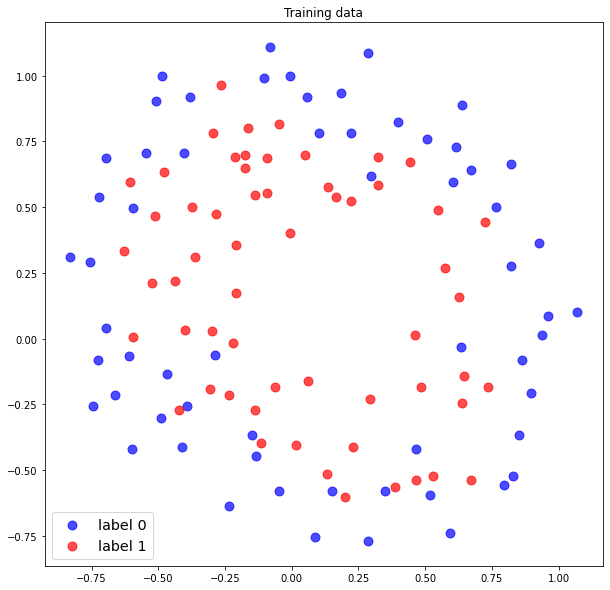

In [78]:
import matplotlib.pyplot as plt

X_label0 = X_raw[np.squeeze(Y_raw) == 0]
X_label1 = X_raw[np.squeeze(Y_raw) == 1]

plt.figure(figsize=(10, 10))
plt.title('Training data')
plt.scatter(X_label0[:, 0], X_label0[:, 1], alpha=0.7, c='b', s=80)
plt.scatter(X_label1[:, 0], X_label1[:, 1], alpha=0.7, c='r', s=80)
plt.legend(['label 0', 'label 1'], fontsize='x-large', loc='lower left')
plt.show()

### 4-2. Write down the high dimensional function $g(x, y; \theta)$

### 4-3. Plot the training error

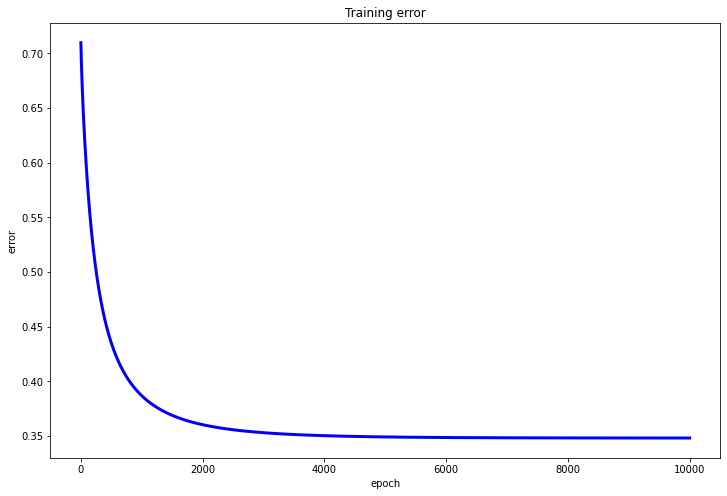

In [68]:
epoch_tick = np.arange(epoch_count)

plt.figure(figsize=(12, 8))
plt.title('Training error')
plt.plot(epoch_tick, history['train_err'], 'b-', linewidth=3)
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()

### 4-4. Plot the training accuracy

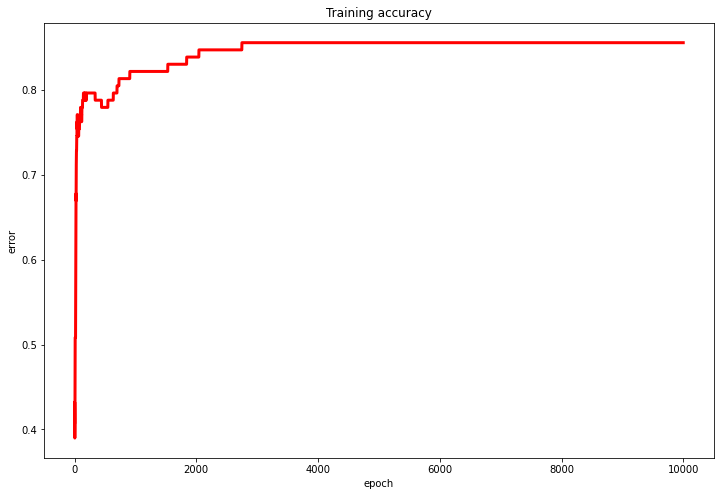

In [69]:
plt.figure(figsize=(12, 8))
plt.title('Training accuracy')
plt.plot(epoch_tick, history['train_acc'], 'r-', linewidth=3)
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()

### 4-5. Write down the final training accuracy

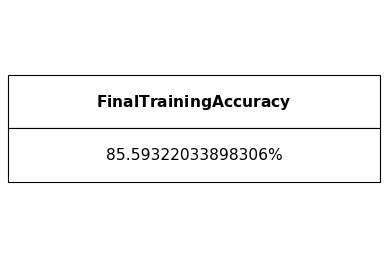

In [77]:
fig = plt.figure(dpi=80)
ax = fig.add_subplot(1,1,1)
table_data=[
    ["$\\bf{Final Training Accuracy}$"],
    [f'{history["train_acc"][-1] * 100}%'],
]
table = ax.table(cellText=table_data, loc='center', cellLoc='center')
table.set_fontsize(14)
table.scale(1, 4)
ax.axis('off')
plt.show()

### 4-6. Plot the optimal classifier superimposed on the training data